## Embedding in $d=2$, cycling network

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from neurodyn import *

## Sanity checks

simulating LowRankRNN{N=20000, p=2, phi=sigmoid, I_ext=zero, exclude_self_connections=True}: 100.00%|██████████| t=40.000 of 40 [00:01<00:00]


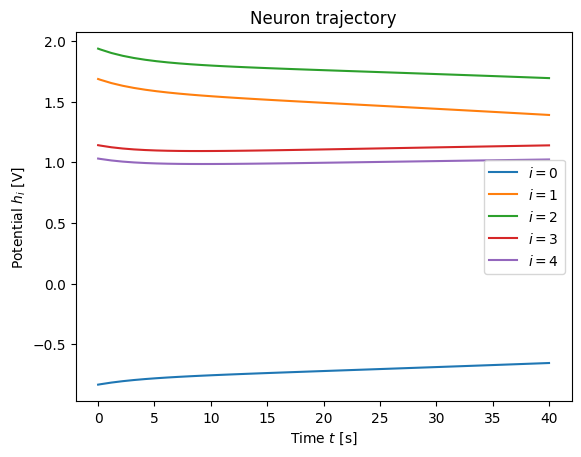

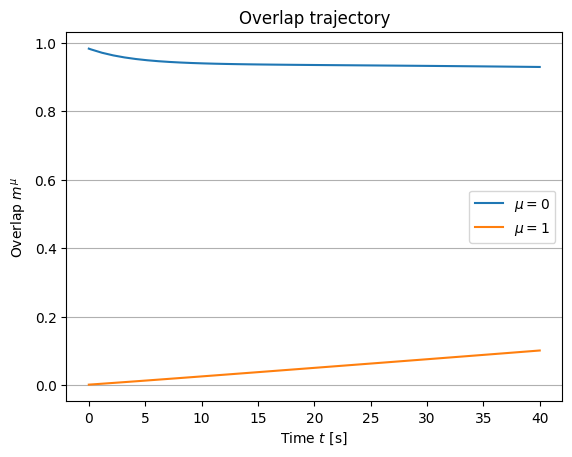

In [2]:
rnn = LowRankRNN.new_valentin(p=2, N=20_000, phi=sigmoid, I_ext=zero, exclude_self_connections=True)
res = rnn.simulate(rnn.F[:, 0], (0, 40), dt_max=1, progress=True)
plot_neuron_trajectory(res);
plot_overlap_trajectory(rnn, res);

simulating LowRankCyclingRNN{N=20000, p=2, delta=0, shift=0, phi=sigmoid, I_ext=zero, exclude_self_connections=True}: 100.00%|██████████| t=40.000 of 40 [00:01<00:00]


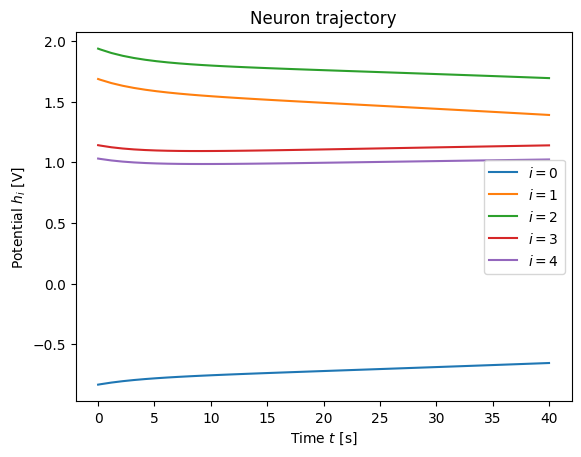

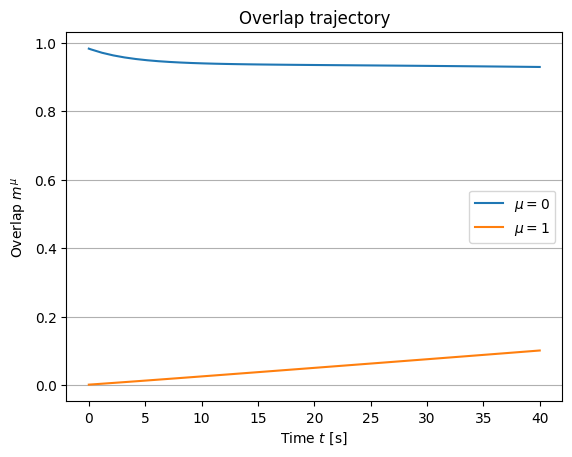

In [3]:
rnn = LowRankCyclingRNN.new_valentin(p=2, N=20_000, phi=sigmoid, I_ext=zero, exclude_self_connections=True, delta=0, shift=0)
res = rnn.simulate(rnn.F[:, 0], (0, 40), dt_max=1, progress=True)
plot_neuron_trajectory(res);
plot_overlap_trajectory(rnn, res);

simulating LowRankCyclingRNN{N=20000, p=2, delta=0, shift=1, phi=sigmoid, I_ext=zero, exclude_self_connections=True}: 100.00%|██████████| t=40.000 of 40 [00:01<00:00]


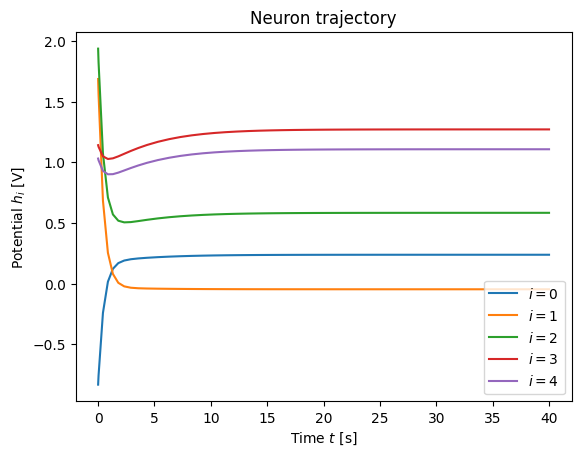

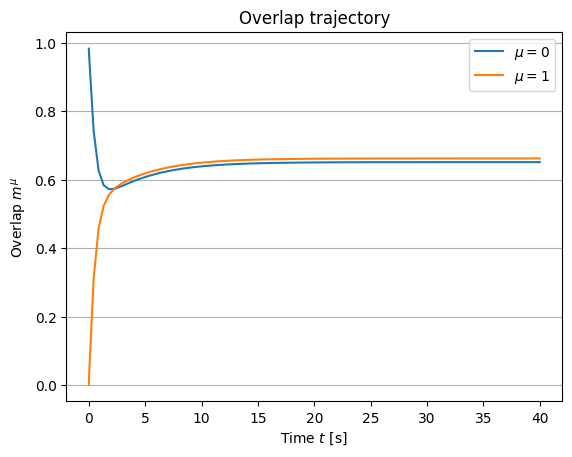

In [4]:
rnn = LowRankCyclingRNN.new_valentin(p=2, N=20_000, phi=sigmoid, I_ext=zero, exclude_self_connections=True, delta=0, shift=1)
res = rnn.simulate(rnn.F[:, 0], (0, 40), dt_max=1, progress=True)
plot_neuron_trajectory(res);
plot_overlap_trajectory(rnn, res);

simulating LowRankCyclingRNN{N=20000, p=2, delta=10, shift=1, phi=sigmoid, I_ext=zero}: 100.00%|██████████| t=40.000 of 40 [00:03<00:00]


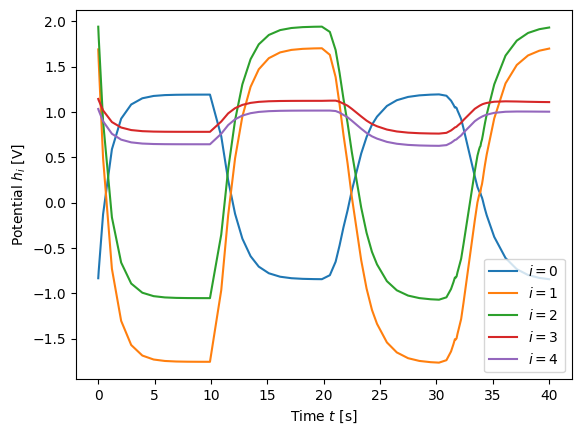

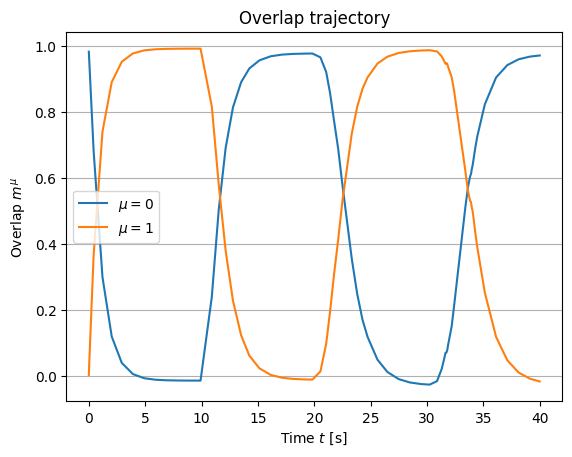

In [11]:
rnn = LowRankCyclingRNN.new_valentin(p=2, N=20_000, phi=sigmoid, I_ext=zero, exclude_self_connections=True, delta=10, shift=1)
res = rnn.simulate(rnn.F[:, 0], (0, 40), dt_max=1, progress=True)
plot_neuron_trajectory(res);
plot_overlap_trajectory(rnn, res);

## Testing different $\delta$ offsets

simulating LowRankCyclingRNN{N=20000, p=2, delta=2, shift=1, phi=sigmoid, I_ext=zero}: 100.00%|██████████| t=40.000 of 40 [00:05<00:00]


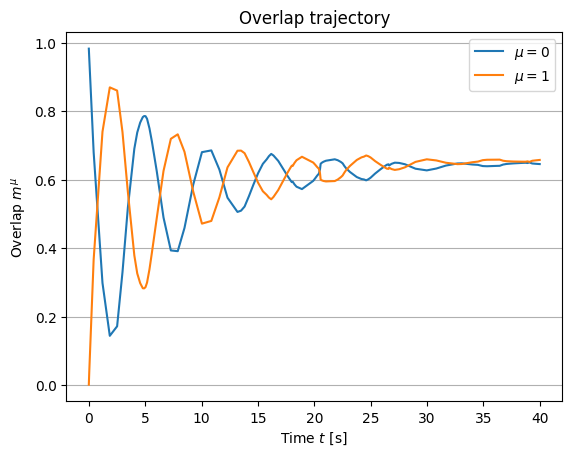

In [12]:
rnn = LowRankCyclingRNN.new_valentin(p=2, N=20_000, phi=sigmoid, I_ext=zero, exclude_self_connections=True, delta=2, shift=1)
res = rnn.simulate(rnn.F[:, 0], (0, 40), dt_max=1, progress=True)
plot_overlap_trajectory(rnn, res);

simulating LowRankCyclingRNN{N=20000, p=2, delta=6, shift=1, phi=sigmoid, I_ext=zero}: 100.00%|██████████| t=40.000 of 40 [00:03<00:00]


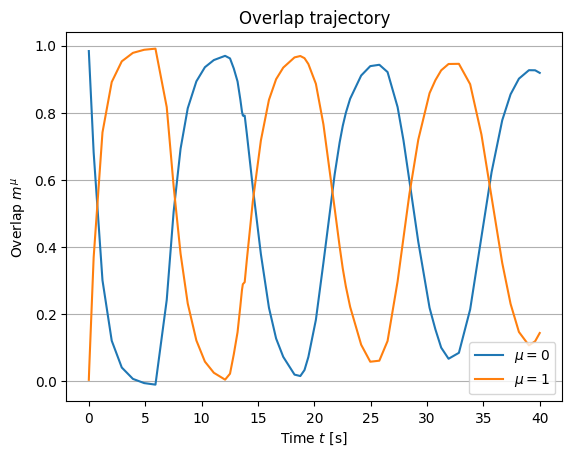

In [13]:
rnn = LowRankCyclingRNN.new_valentin(p=2, N=20_000, phi=sigmoid, I_ext=zero, exclude_self_connections=True, delta=6, shift=1)
res = rnn.simulate(rnn.F[:, 0], (0, 40), dt_max=1, progress=True)
plot_overlap_trajectory(rnn, res);

simulating LowRankCyclingRNN{N=20000, p=2, delta=10, shift=1, phi=sigmoid, I_ext=zero}: 100.00%|██████████| t=40.000 of 40 [00:03<00:00]


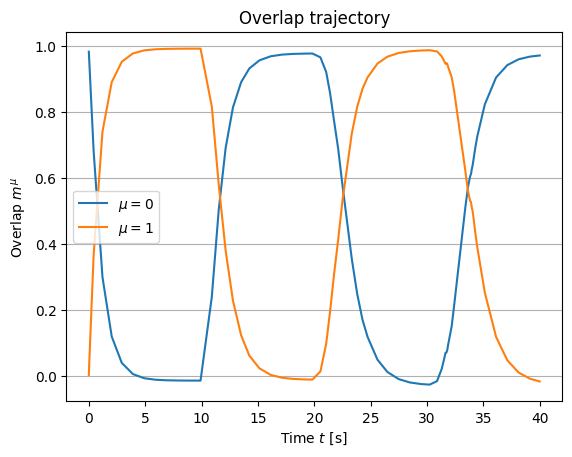

In [14]:
rnn = LowRankCyclingRNN.new_valentin(p=2, N=20_000, phi=sigmoid, I_ext=zero, exclude_self_connections=True, delta=10, shift=1)
res = rnn.simulate(rnn.F[:, 0], (0, 40), dt_max=1, progress=True)
plot_overlap_trajectory(rnn, res);
# res = rnn.simulate_h(np.concatenate([rnn.F[:rnn.N//2, 0], rnn.F[rnn.N//2:, 1]]), (0, 40), dt_max=1, progress=True)

-> it looks like there is some damping, i.e. we expect the cycling to stop after a while

## Make animations

[LowRankCyclingRNN{N=20000, p=2, delta=6, shift=1, phi=sigmoid, I_ext=zero}] loading cached simulation 4cb4a2a356...


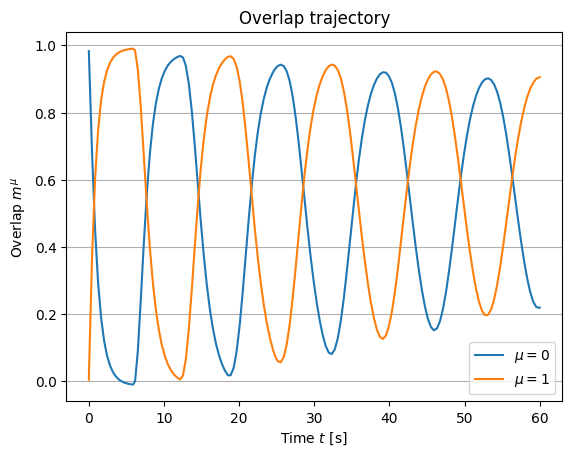

In [17]:
rnn = LowRankCyclingRNN.new_valentin(p=2, N=20_000, phi=sigmoid, I_ext=zero, exclude_self_connections=True, delta=6, shift=1)
res = rnn.simulate(rnn.F[:, 0], (0, 60), dt_max=0.4, progress=True, cache=True)
plot_overlap_trajectory(rnn, res);

In [6]:
animate2d(rnn, res, 'animations/embedding_d=2_h0=0_cycling_delta=6.mp4')

100%|██████████| 155/155 [05:24<00:00,  2.09s/it]
